In [5]:
## Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

In [6]:
## Directory where the dataset is located
data_dir = r"C:\Users\anzda\OneDrive\Desktop\Freelance Work\Data Engineering\weatherdata_for_students"

In [7]:
## Listing all files in the directory that start with "brighton"
file_names = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith("brighton")]

In [8]:
## Counting the number of files opened/used
num_files_used = len(file_names)

In [9]:
## Loading all files into a single DataFrame
dfs = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

full_df = pd.concat(dfs)

In [10]:
## Dropping columns with numbered names
full_df.drop(full_df.filter(regex='^\d+$').columns, axis=1, inplace=True)

In [11]:
## Displaying basic information about the dataset
print("Number of files opened/used:", num_files_used)
print("\nDataset Info:")
print(full_df.info())

Number of files opened/used: 128

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 122922 entries, 0 to 924
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          48001 non-null  object 
 1   temp              47900 non-null  float64
 2   dew               47894 non-null  float64
 3   humidity          47907 non-null  float64
 4   precip            47898 non-null  float64
 5   precipprob        47894 non-null  float64
 6   preciptype        4671 non-null   object 
 7   snow              38252 non-null  float64
 8   snowdepth         38182 non-null  float64
 9   windspeed         47903 non-null  float64
 10  winddir           47899 non-null  float64
 11  sealevelpressure  47818 non-null  float64
 12  cloudcover        47884 non-null  float64
 13  solarradiation    47859 non-null  float64
 14  solarenergy       47857 non-null  float64
 15  uvindex           47861 non-null  float64
dty

In [12]:
## Displaying first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(full_df.head())


First few rows of the dataset:
              datetime  temp  dew  humidity  precip  precipprob preciptype  \
0  2010-01-01T00:00:00   1.9 -0.5     84.25   0.417       100.0  rain,snow   
1  2010-01-01T01:00:00   1.9 -0.5     83.90   0.000         0.0        NaN   
2  2010-01-01T02:00:00   1.4 -0.7     85.76   0.000         0.0        NaN   
3  2010-01-01T03:00:00   1.4 -0.7     85.69   0.000         0.0        NaN   
4  2010-01-01T04:00:00   1.3 -0.8     85.72   0.000         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   0.0        0.0       19.4     11.0             999.9        62.2   
1   0.0        0.0       21.8     19.0             999.8        22.4   
2   0.0        0.0       17.7     10.0            1000.0        38.0   
3   0.0        0.0       18.0     11.0            1000.2        66.7   
4   0.0        0.0       17.4     10.0            1000.5        62.8   

   solarradiation  solarenergy  uvindex  
0             0.0       

In [13]:
## Checking for missing values
print("\nMissing values:")
print(full_df.isnull().sum())


Missing values:
datetime             74921
temp                 75022
dew                  75028
humidity             75015
precip               75024
precipprob           75028
preciptype          118251
snow                 84670
snowdepth            84740
windspeed            75019
winddir              75023
sealevelpressure     75104
cloudcover           75038
solarradiation       75063
solarenergy          75065
uvindex              75061
dtype: int64


In [14]:
summary_stats = full_df.describe()

# Display mean, median, mode, max, and min for each column
print("\nSummary Statistics Before Missing Fix:")
for col in full_df.columns:
    print(f"\nColumn: {col}")
    if col != 'datetime' and col != 'preciptype' and full_df[col].notna().any():  # Skip summary statistics for 'datetime' and 'preciptype' columns, and all null columns
        print(f"Mean: {summary_stats.loc['mean', col]}")
        print(f"Median: {summary_stats.loc['50%', col]}")
        print(f"Mode: {full_df[col].mode().iloc[0]}")
        print(f"Max: {summary_stats.loc['max', col]}")
        print(f"Min: {summary_stats.loc['min', col]}")


Summary Statistics Before Missing Fix:

Column: datetime

Column: temp
Mean: 10.575027139874738
Median: 10.3
Mode: 9.5
Max: 30.9
Min: -6.0

Column: dew
Mean: 7.791573057167914
Median: 8.1
Mode: 9.5
Max: 19.9
Min: -7.7

Column: humidity
Mean: 84.00420251737744
Median: 86.81
Mode: 100.0
Max: 100.0
Min: 24.34

Column: precip
Mean: 0.08697680487703038
Median: 0.0
Mode: 0.0
Max: 27.086
Min: 0.0

Column: precipprob
Mean: 9.573224203449284
Median: 0.0
Mode: 0.0
Max: 100.0
Min: 0.0

Column: preciptype

Column: snow
Mean: 0.00012757502875666634
Median: 0.0
Mode: 0.0
Max: 2.08
Min: 0.0

Column: snowdepth
Mean: 0.024786286731967946
Median: 0.0
Mode: 0.0
Max: 14.0
Min: 0.0

Column: windspeed
Mean: 15.924551698223492
Median: 14.3
Mode: 11.9
Max: 67.6
Min: 0.3

Column: winddir
Mean: 200.65696778638383
Median: 228.0
Mode: 230.0
Max: 360.0
Min: 1.0

Column: sealevelpressure
Mean: 1015.1856811242629
Median: 1016.4
Mode: 1016.5
Max: 1046.2
Min: 955.0

Column: cloudcover
Mean: 62.522842703199395
Median:

In [15]:
## Clean and preprocess the data set

## Handling missing values for numerical columns
# You can choose to fill missing numerical values with mean or median
# Here, we'll fill missing values with the median
numerical_cols = full_df.select_dtypes(include=['float64']).columns
full_df[numerical_cols] = full_df[numerical_cols].fillna(full_df[numerical_cols].median())

## Handling missing values for categorical columns
# You can replace missing categorical values with a placeholder or mode
# Here, we'll fill missing categorical values with the mode
categorical_cols = full_df.select_dtypes(include=['object']).columns
full_df[categorical_cols] = full_df[categorical_cols].fillna(full_df[categorical_cols].mode().iloc[0])

In [16]:
## Check for missing values after handling
print("\nMissing values after handling:")
print(full_df.isnull().sum())


Missing values after handling:
datetime            0
temp                0
dew                 0
humidity            0
precip              0
precipprob          0
preciptype          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
uvindex             0
dtype: int64


In [17]:
## Save the cleaned dataset
full_df.to_csv('cleaned_data.csv', index=False)

In [18]:
summary_stats = full_df.describe()
# Display mean, median, mode, max, and min for each column
print("\nSummary Statistics After Fix:")
for col in full_df.columns:
    print(f"\nColumn: {col}")
    if col != 'datetime' and col != 'preciptype' and full_df[col].notna().any():  # Skip summary statistics for 'datetime' and 'preciptype' columns, and all null columns
        print(f"Mean: {summary_stats.loc['mean', col]}")
        print(f"Median: {summary_stats.loc['50%', col]}")
        print(f"Mode: {full_df[col].mode().iloc[0]}")
        print(f"Max: {summary_stats.loc['max', col]}")
        print(f"Min: {summary_stats.loc['min', col]}")


Summary Statistics After Fix:

Column: datetime

Column: temp
Mean: 10.407172027789981
Median: 10.3
Mode: 10.3
Max: 30.9
Min: -6.0

Column: dew
Mean: 7.979827858316655
Median: 8.1
Mode: 8.1
Max: 19.9
Min: -7.7

Column: humidity
Mean: 85.71648264753257
Median: 86.81
Mode: 86.81
Max: 100.0
Min: 24.34

Column: precip
Mean: 0.03389153284196483
Median: 0.0
Mode: 0.0
Max: 27.086
Min: 0.0

Column: precipprob
Mean: 3.7300076471258197
Median: 0.0
Mode: 0.0
Max: 100.0
Min: 0.0

Column: preciptype

Column: snow
Mean: 3.969997234018321e-05
Median: 0.0
Mode: 0.0
Max: 2.08
Min: 0.0

Column: snowdepth
Mean: 0.00769911000471844
Median: 0.0
Mode: 0.0
Max: 14.0
Min: 0.0

Column: windspeed
Mean: 14.933091716698398
Median: 14.3
Mode: 14.3
Max: 67.6
Min: 0.3

Column: winddir
Mean: 217.3452441385594
Median: 228.0
Mode: 228.0
Max: 360.0
Min: 1.0

Column: sealevelpressure
Mean: 1015.9276167000211
Median: 1016.4
Mode: 1016.4
Max: 1046.2
Min: 955.0

Column: cloudcover
Mean: 67.94192251997201
Median: 71.4
Mode:

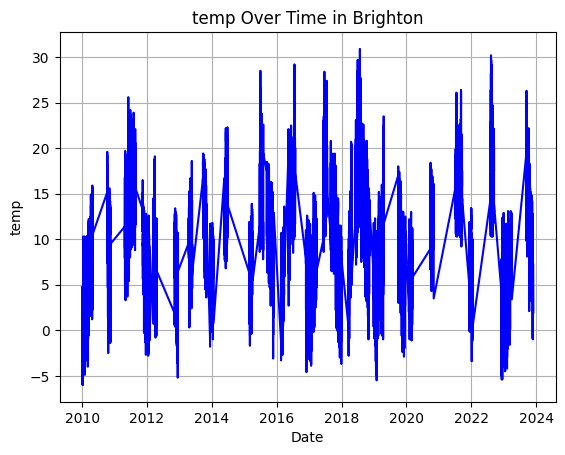

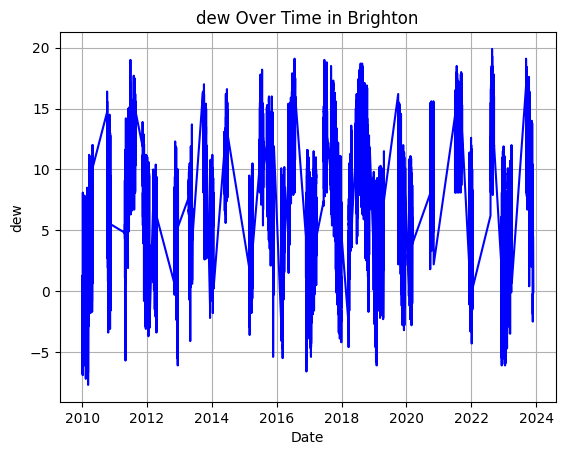

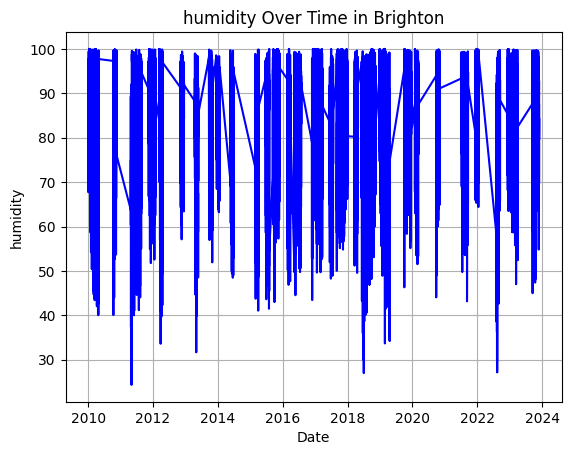

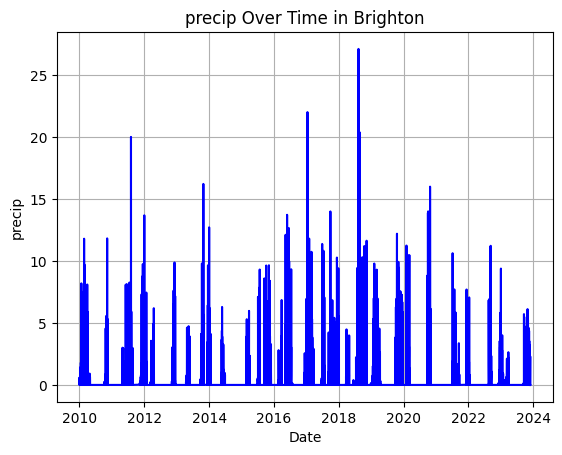

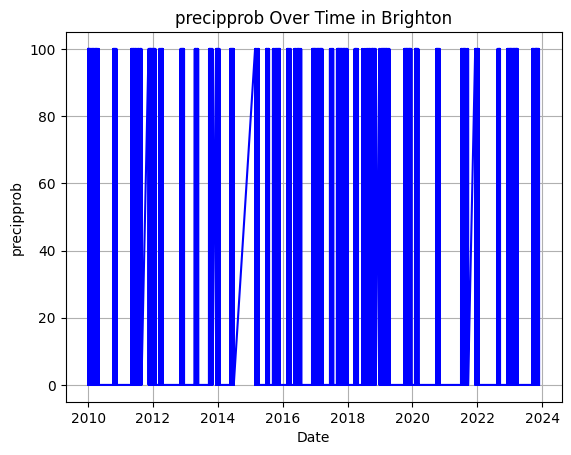

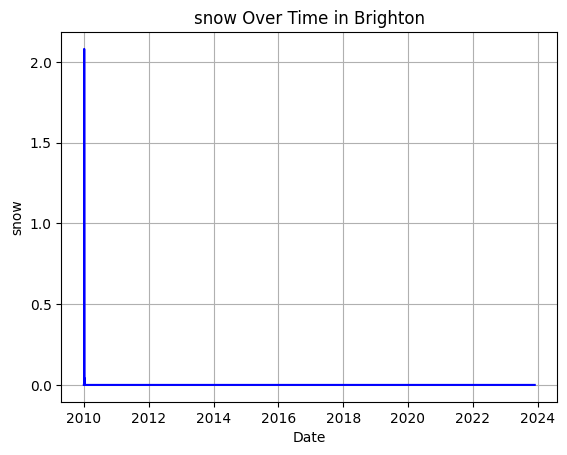

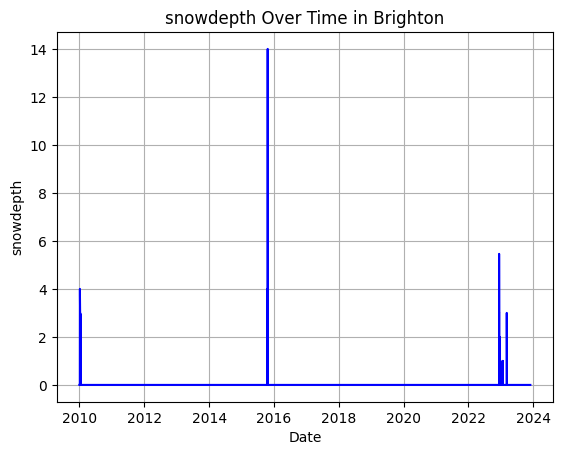

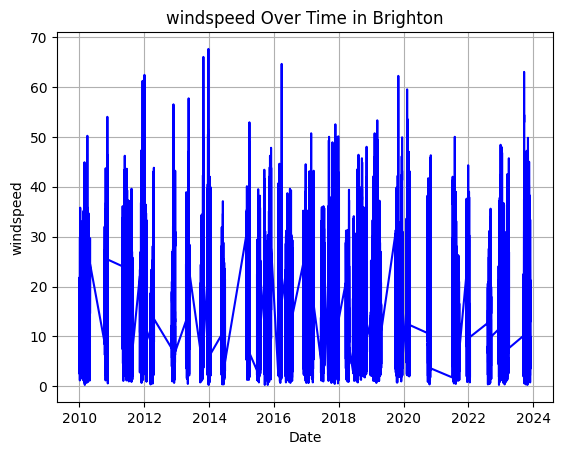

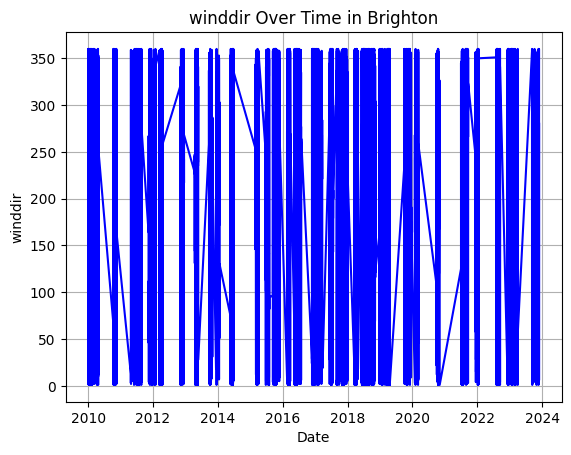

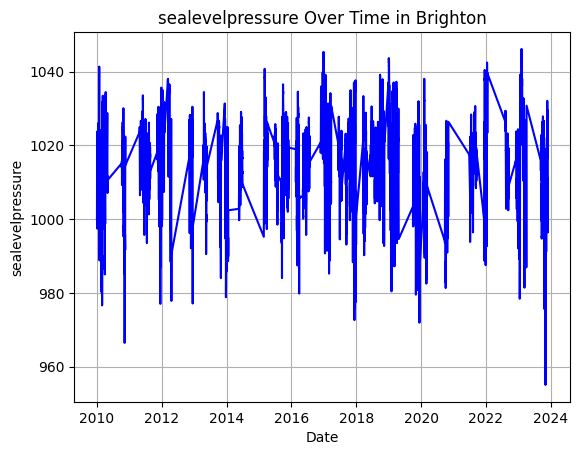

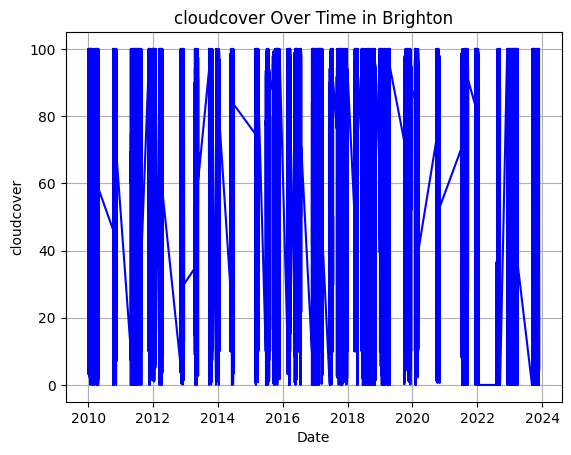

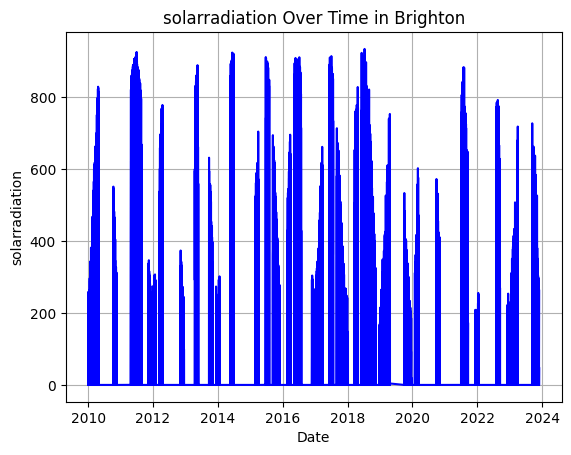

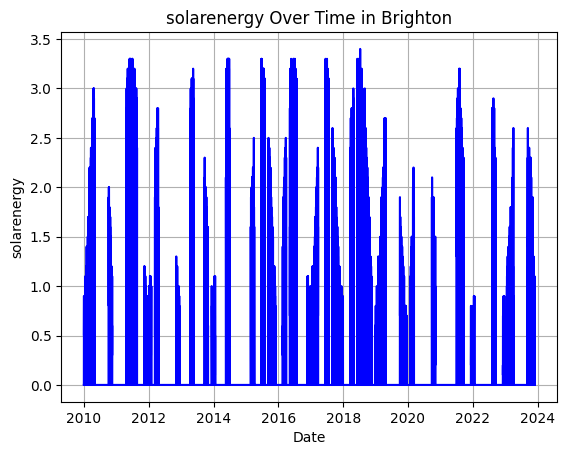

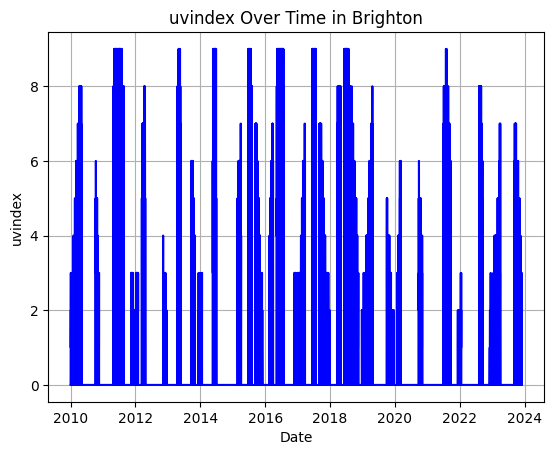

In [21]:
# Convert the 'datetime' column to datetime format
full_df['datetime'] = pd.to_datetime(full_df['datetime'])

# Sort the DataFrame by datetime
full_df.sort_values(by='datetime', inplace=True)

# Plotting line graphs for each numerical column in separate windows
numerical_cols = full_df.select_dtypes(include=['float64']).columns

for col in numerical_cols:
    fig, ax = plt.subplots()
    ax.plot(full_df['datetime'], full_df[col], color='blue')
    ax.set_title(f'{col} Over Time in Brighton')
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.grid(True)
    plt.show()


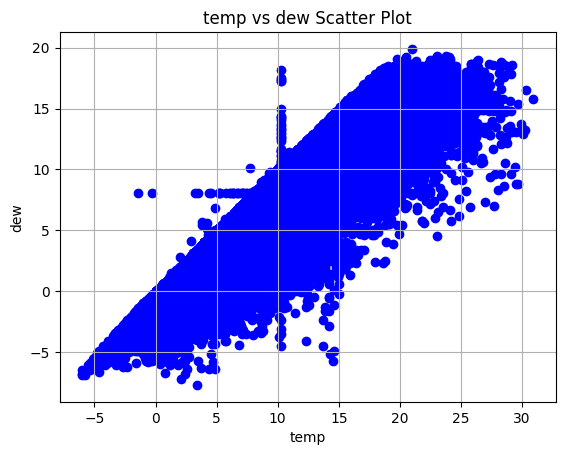

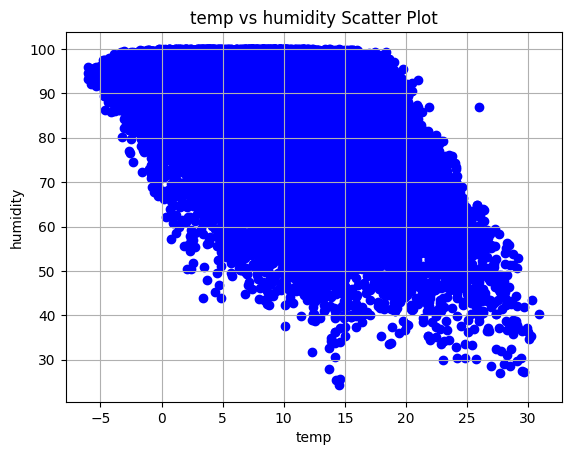

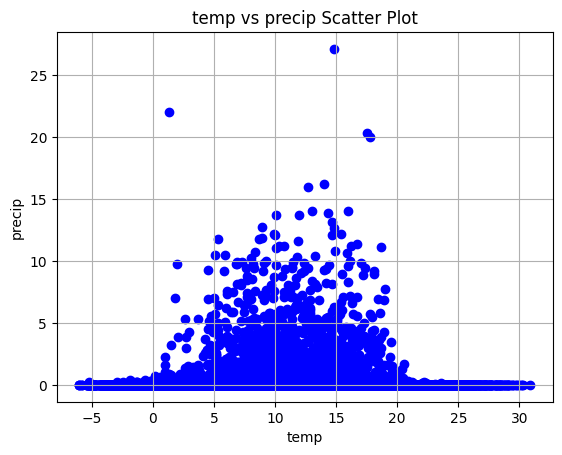

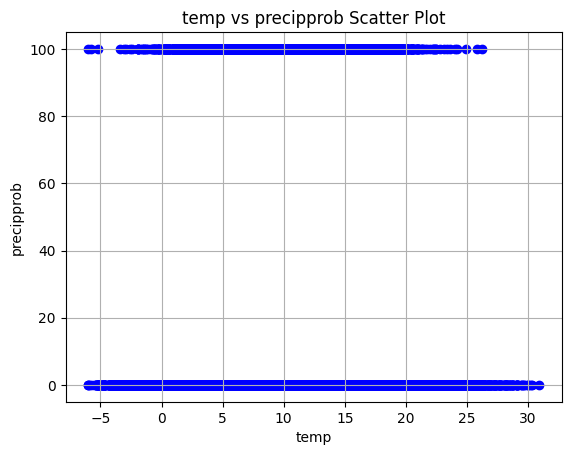

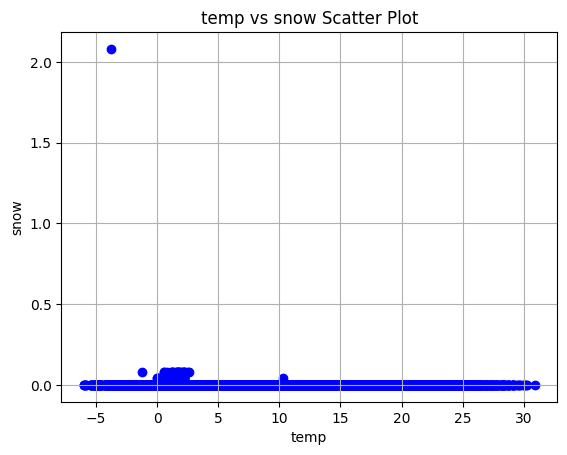

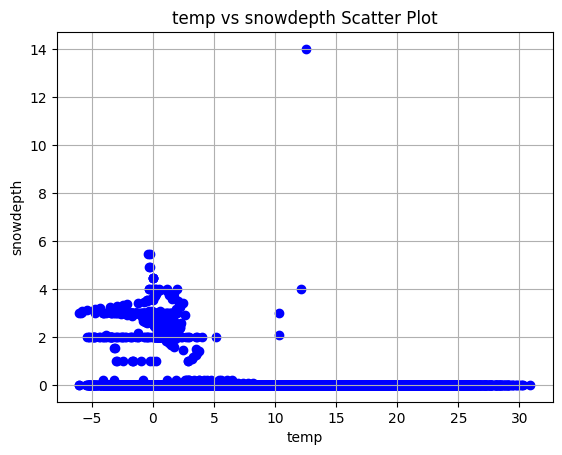

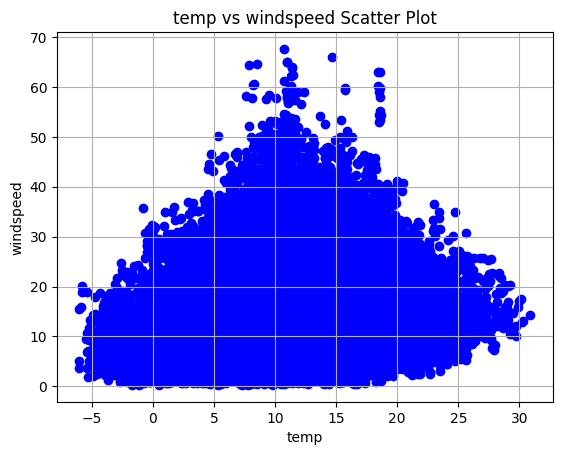

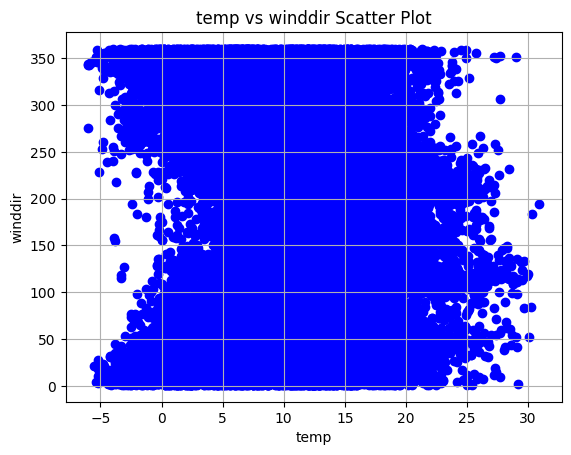

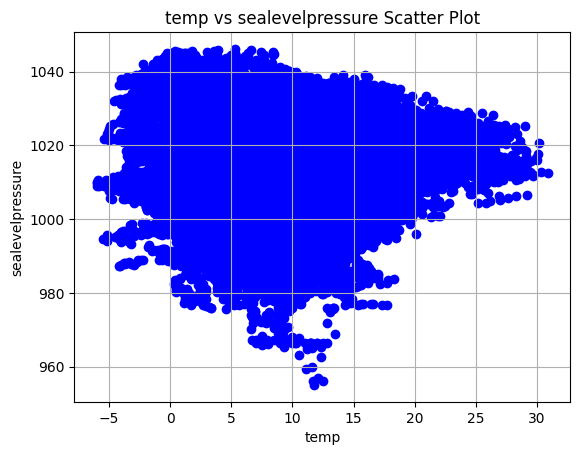

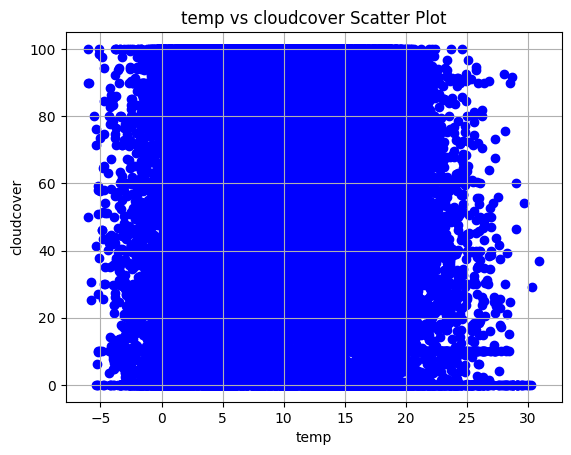

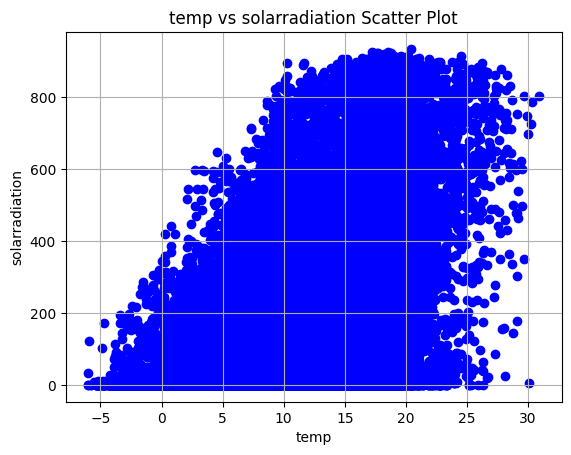

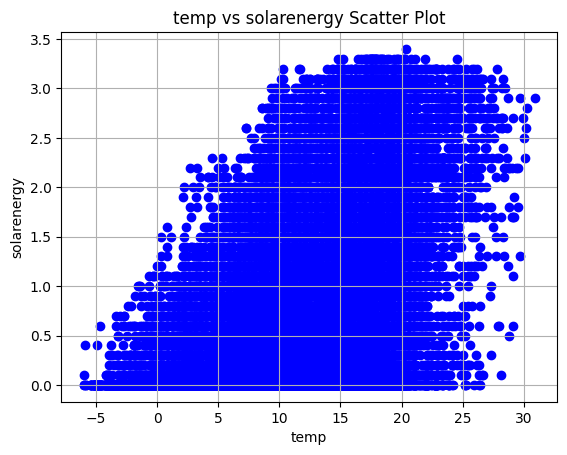

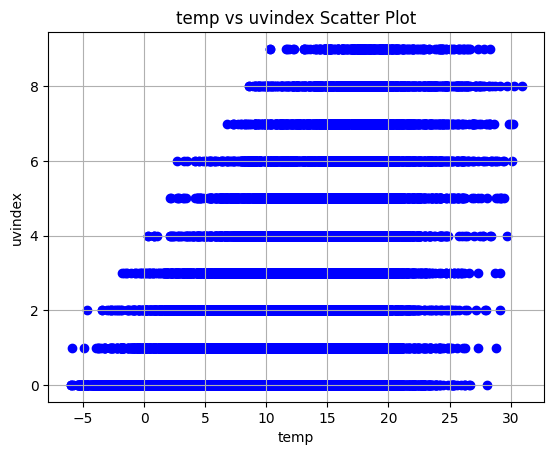

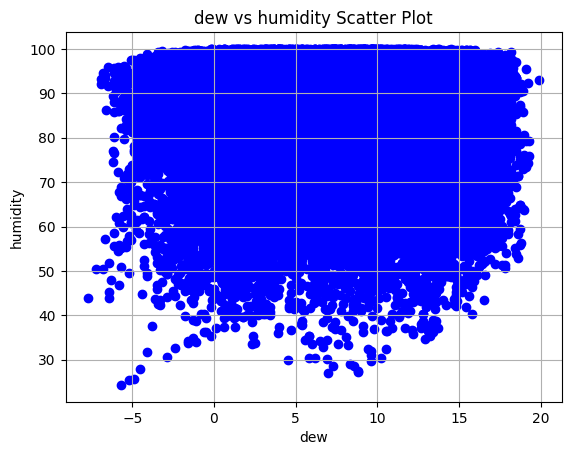

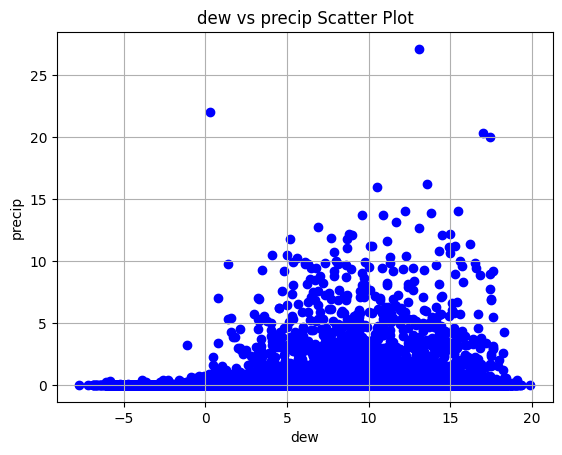

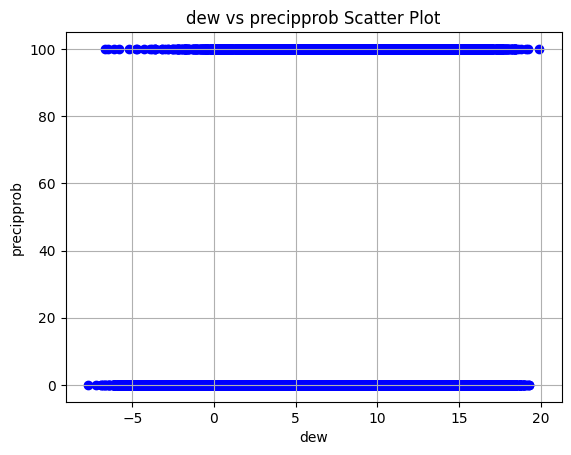

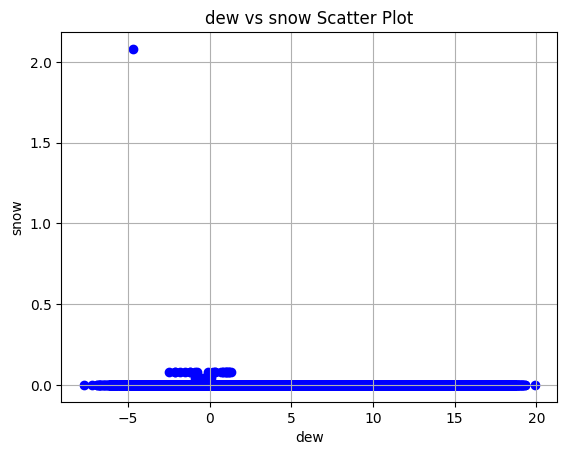

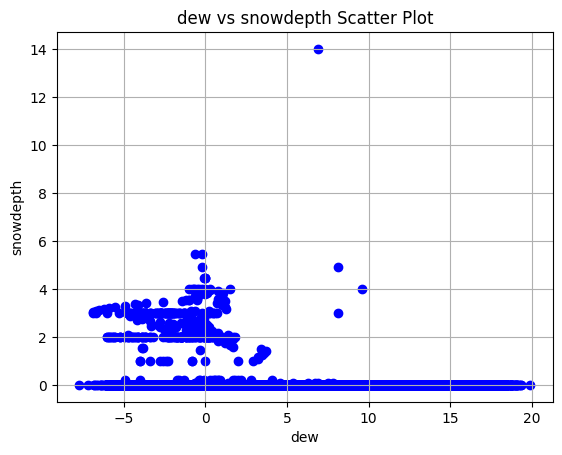

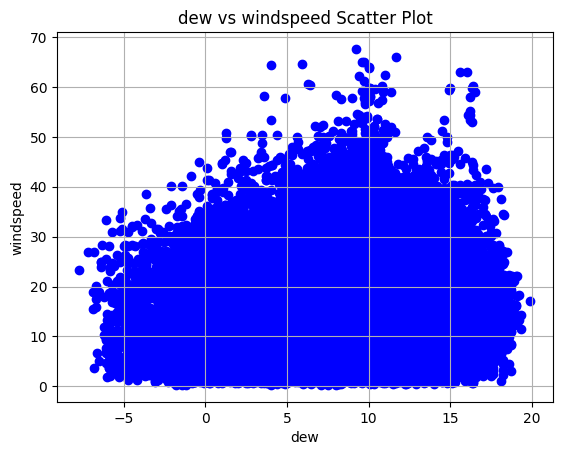

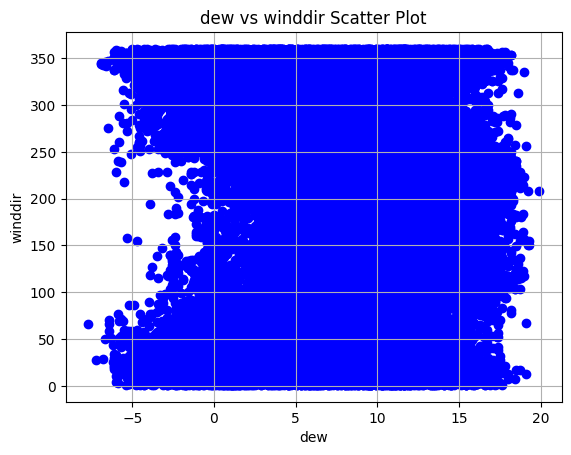

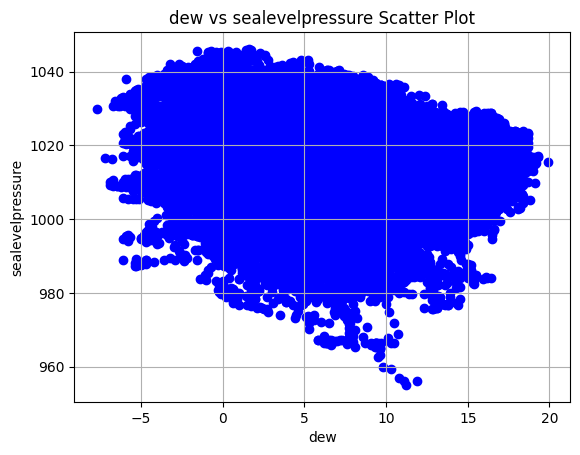

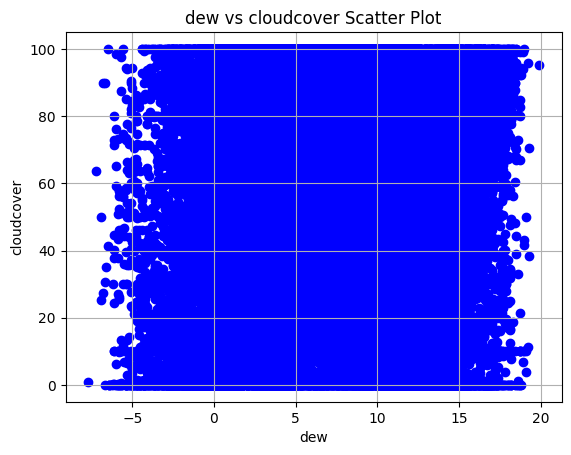

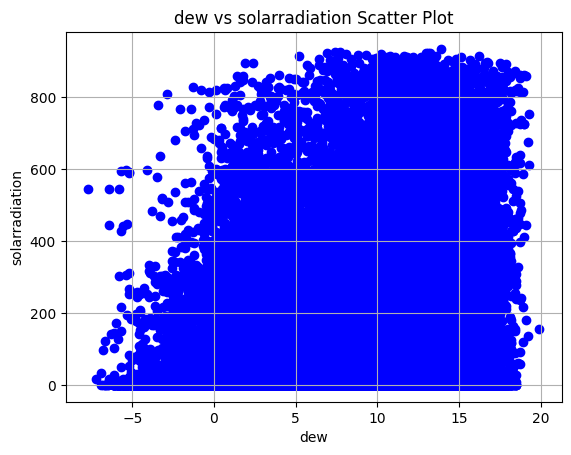

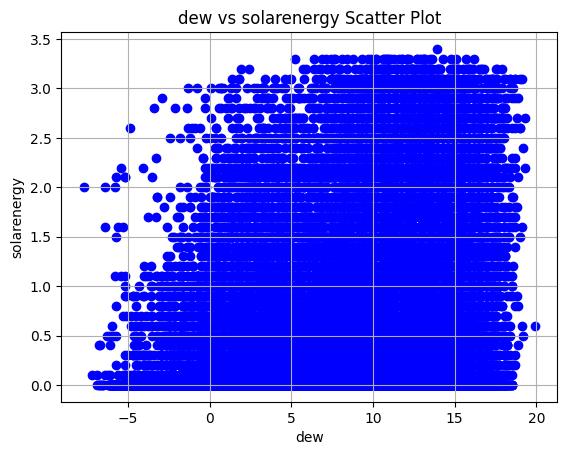

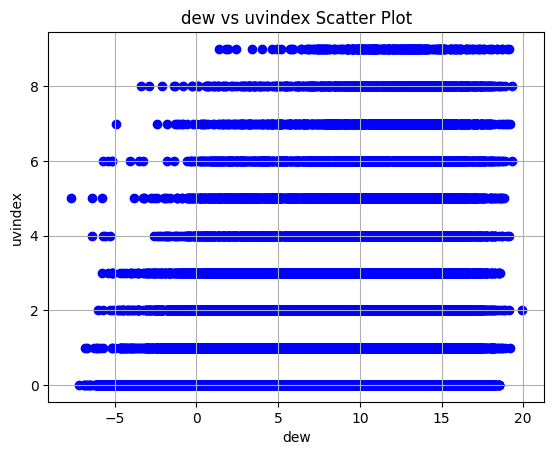

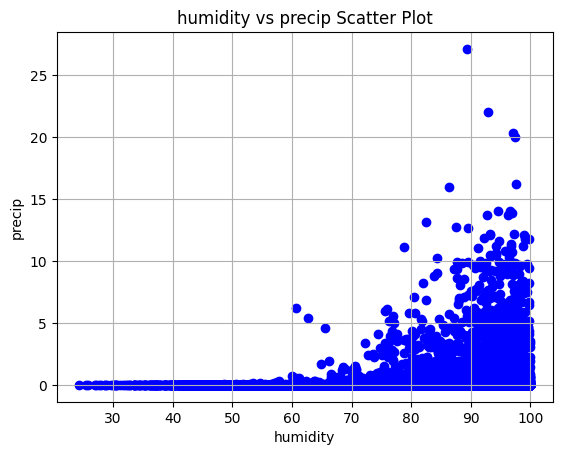

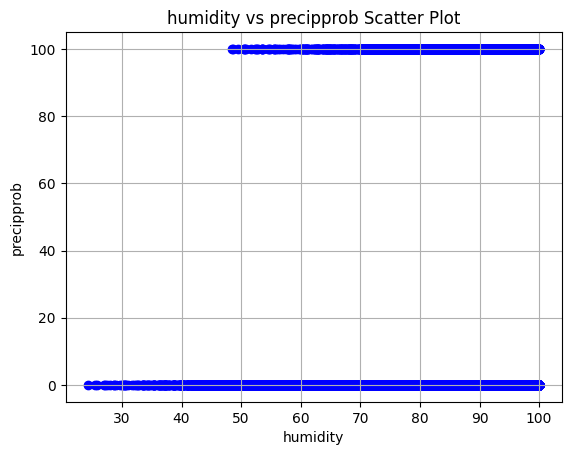

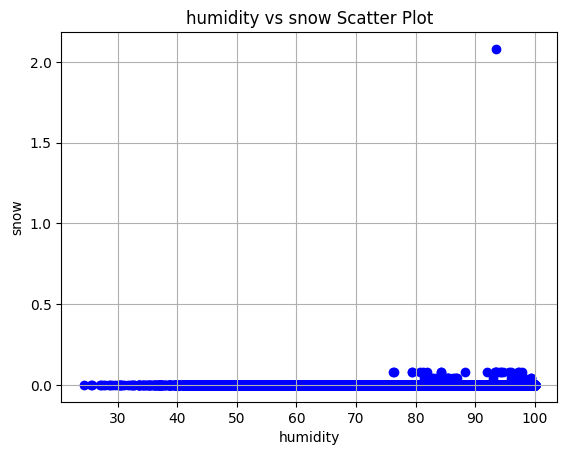

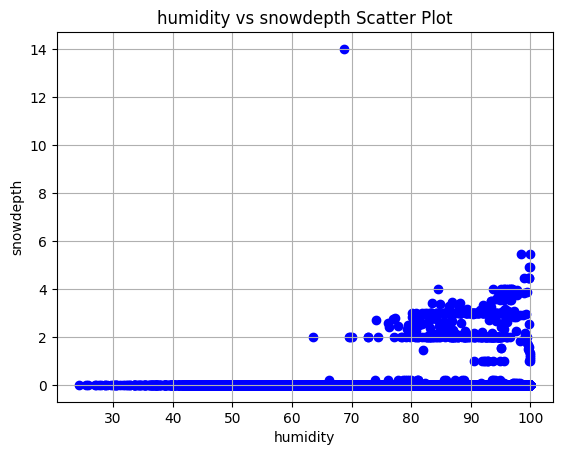

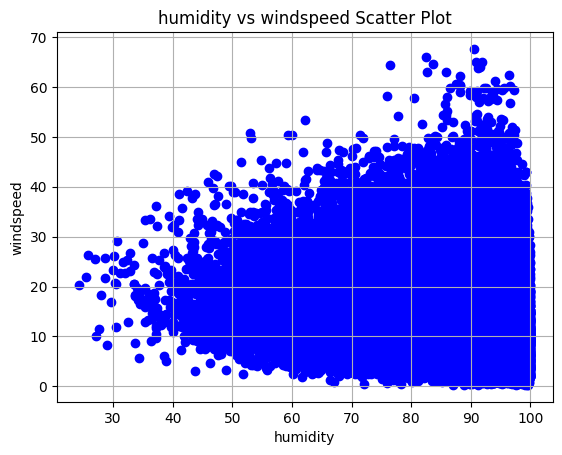

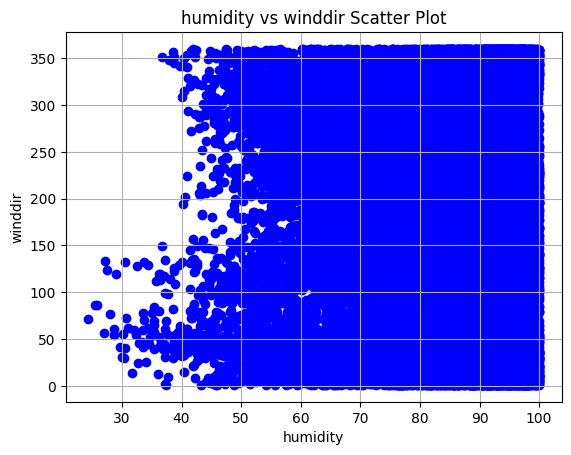

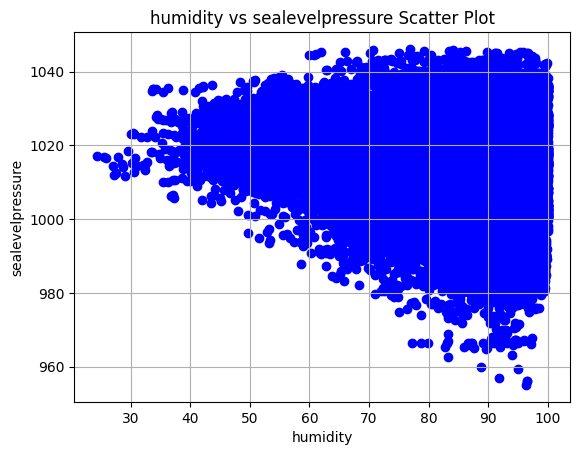

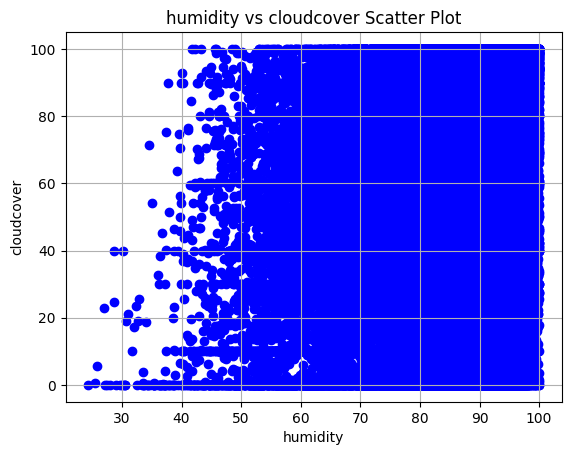

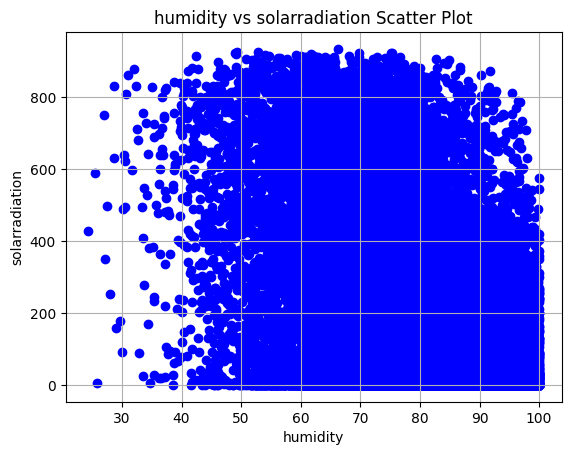

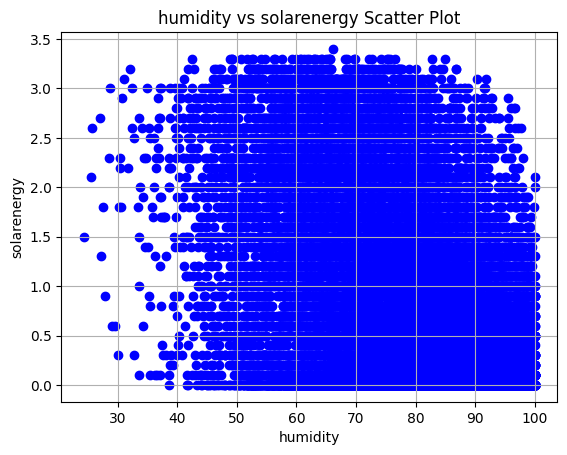

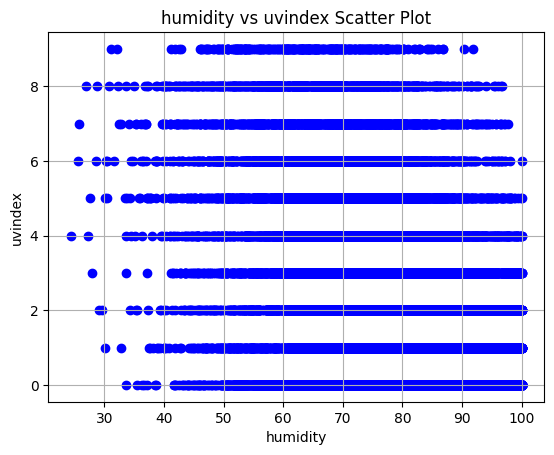

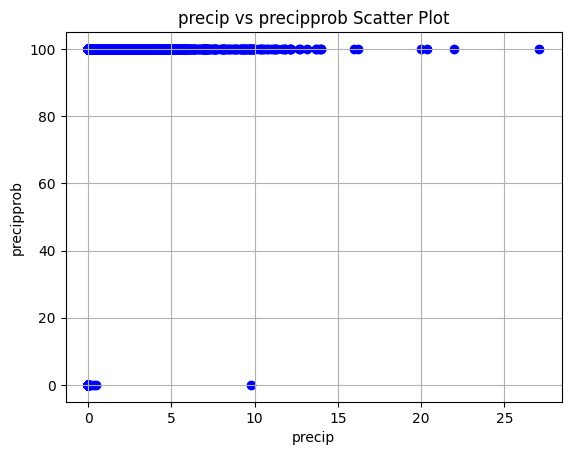

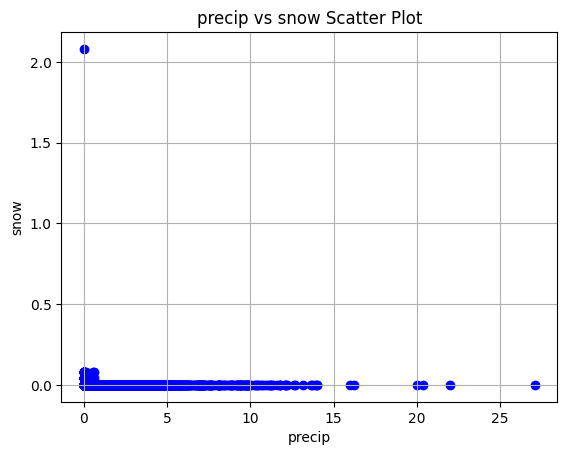

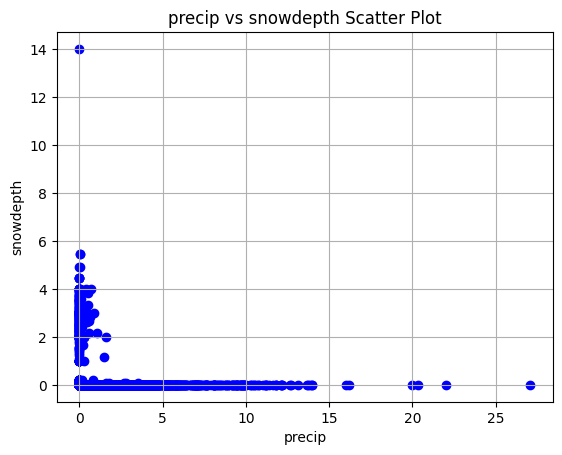

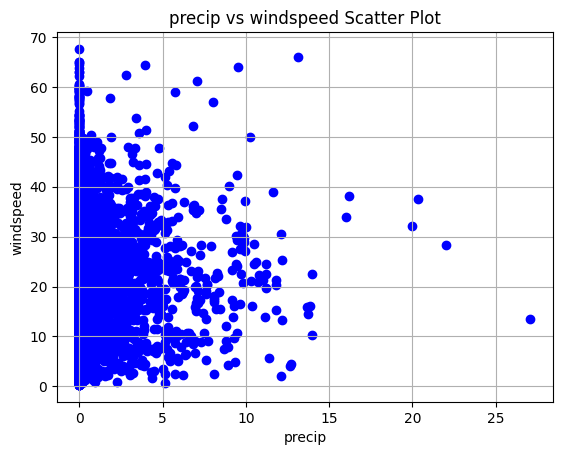

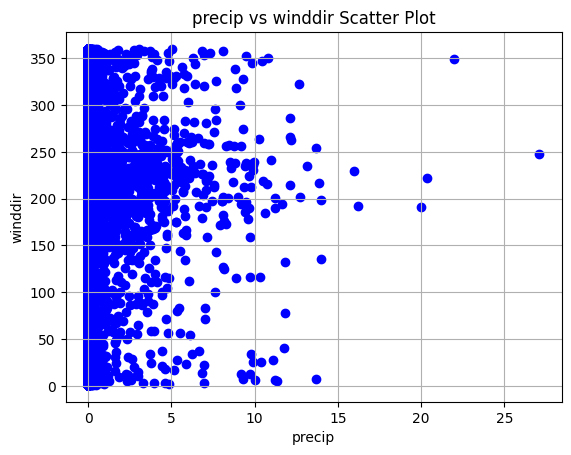

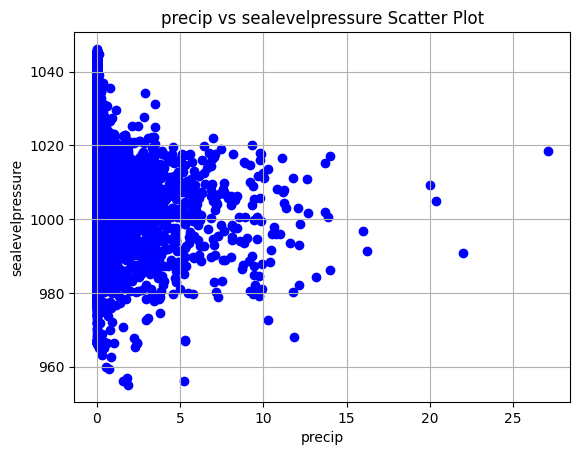

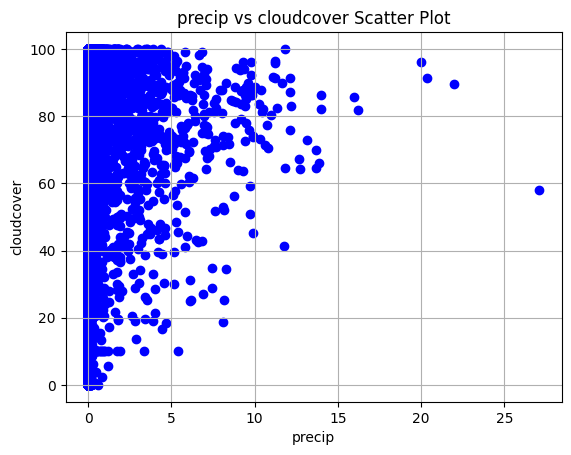

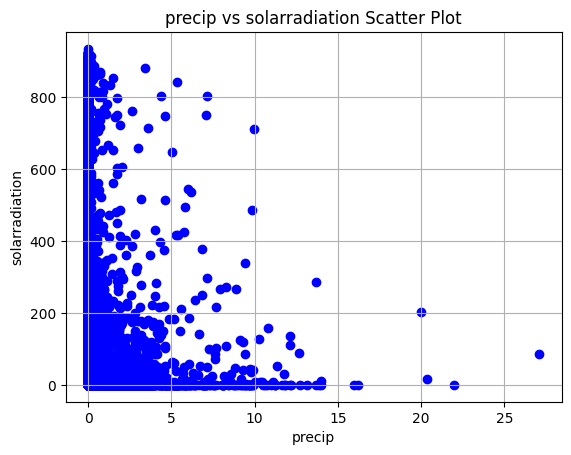

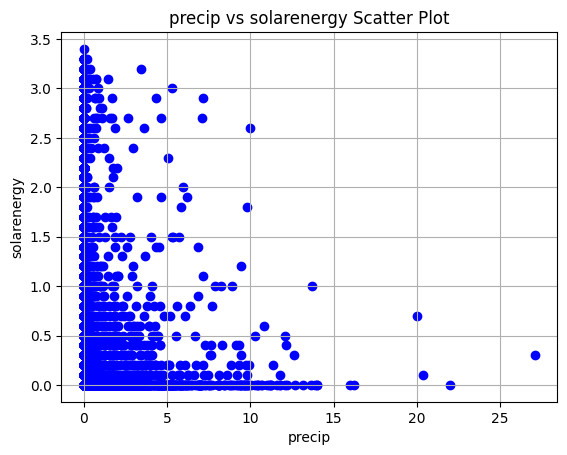

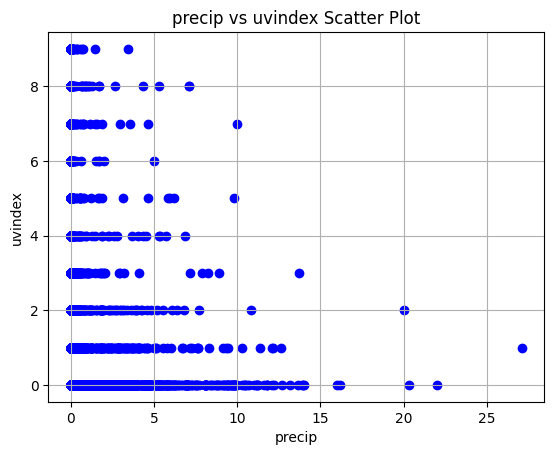

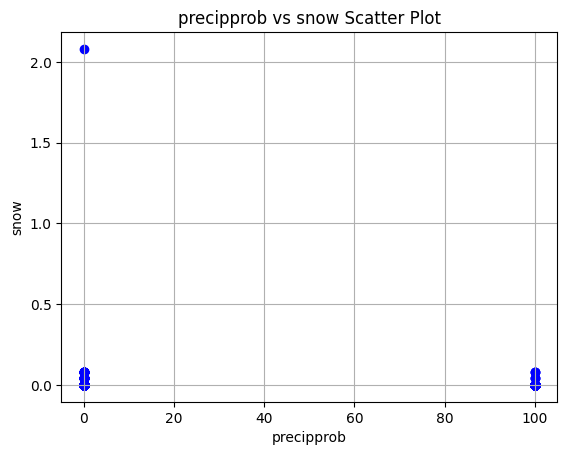

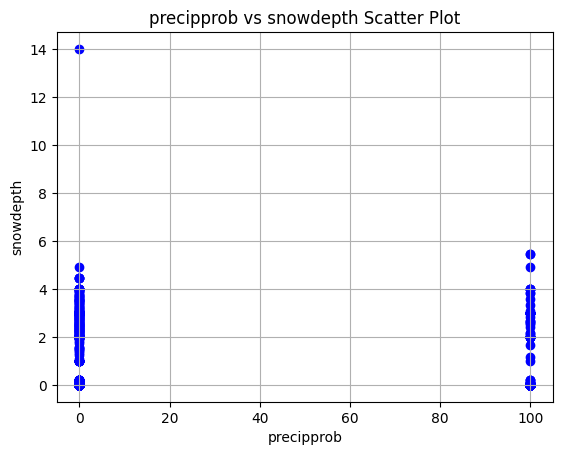

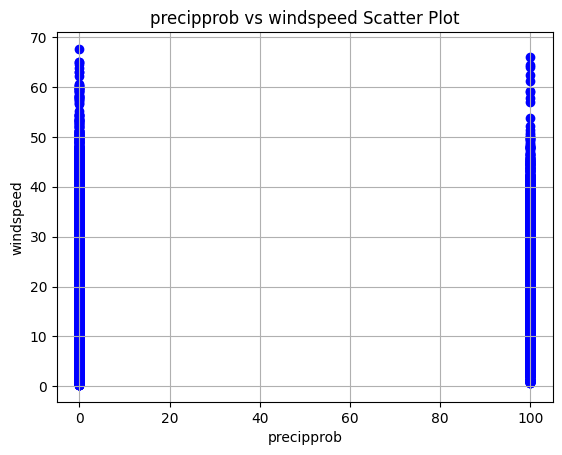

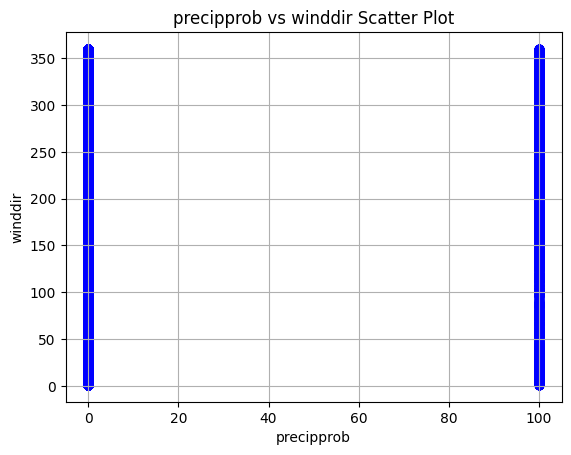

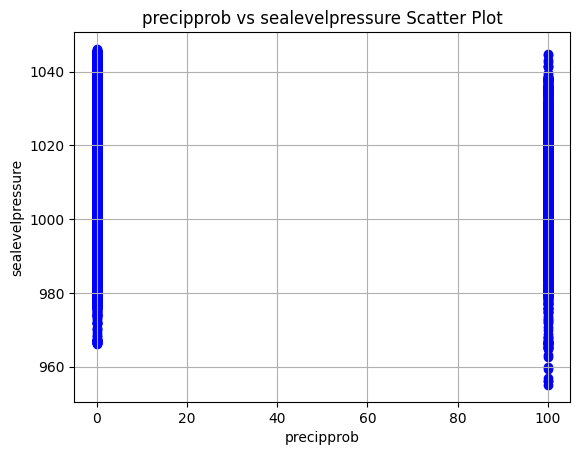

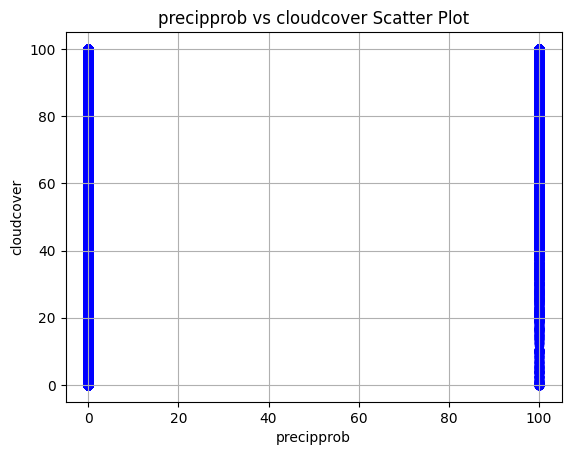

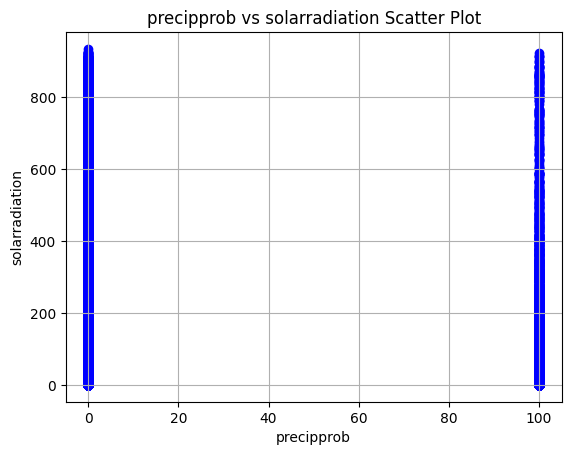

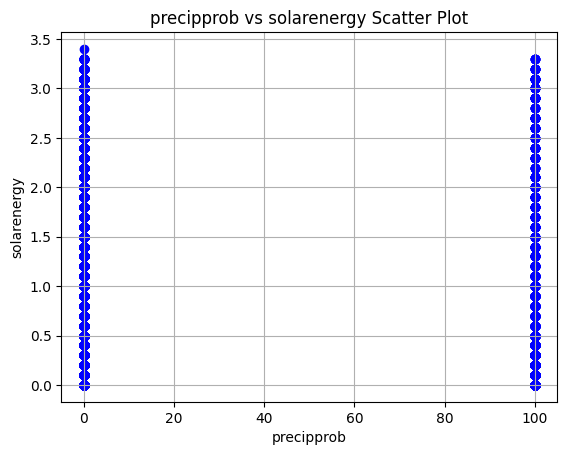

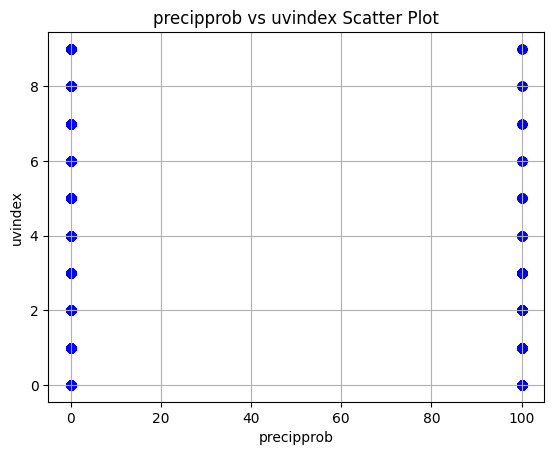

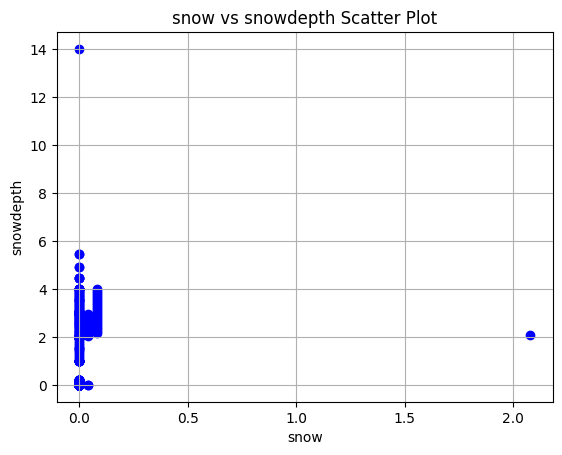

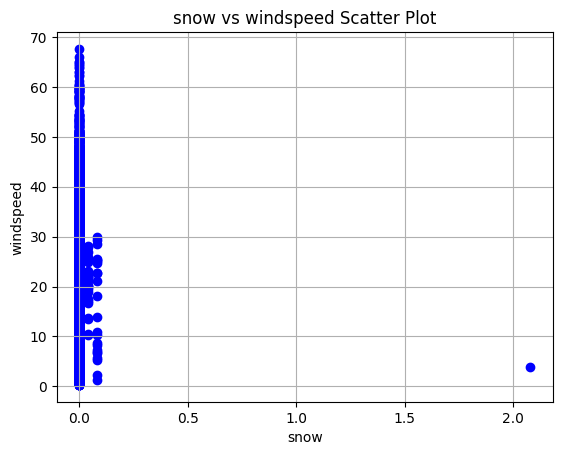

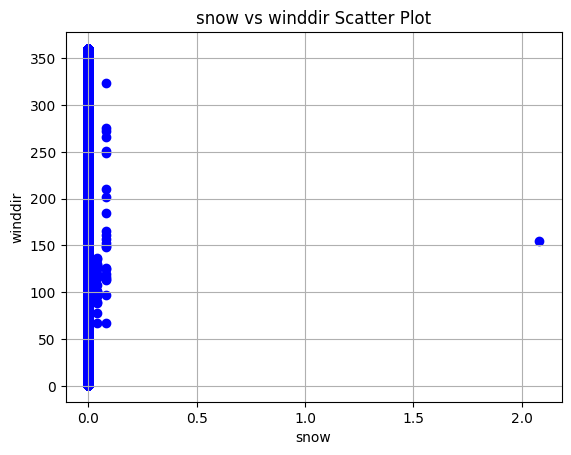

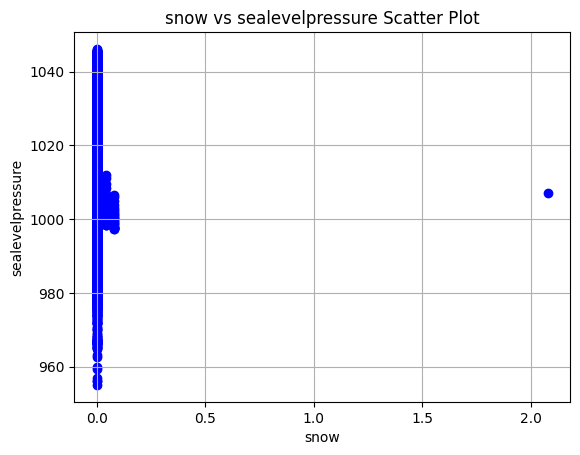

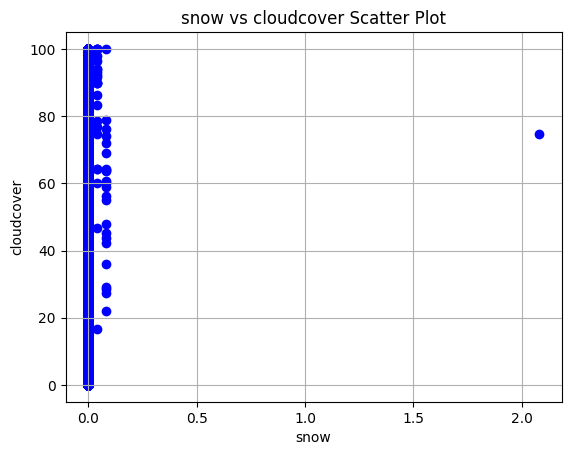

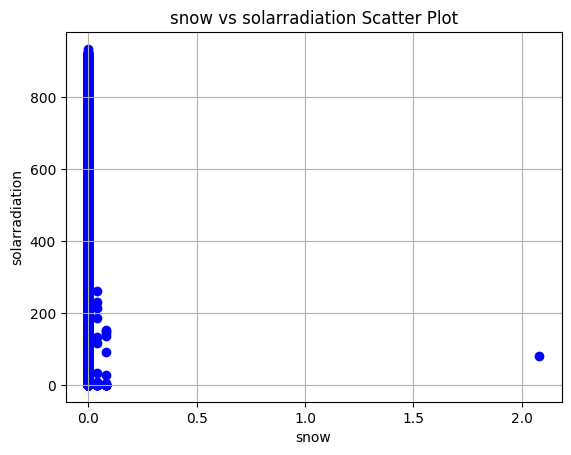

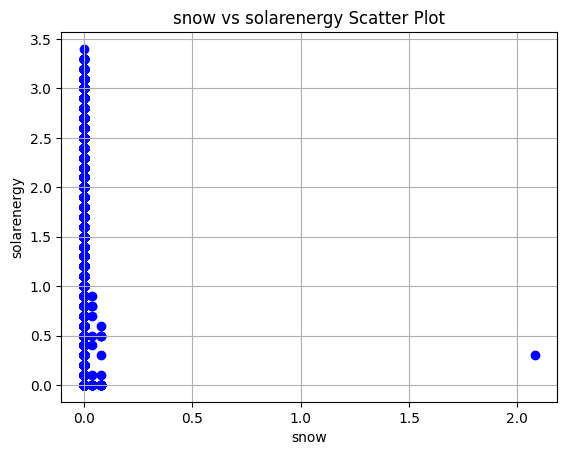

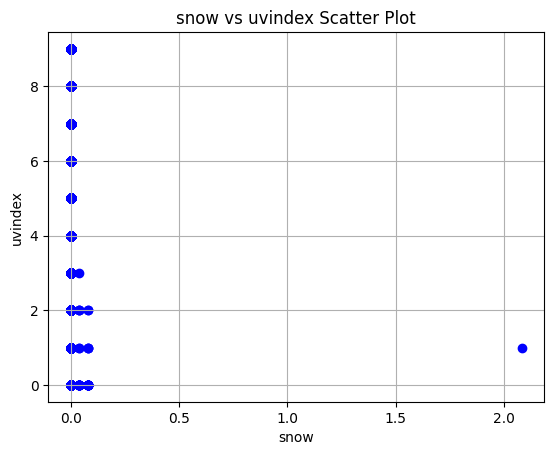

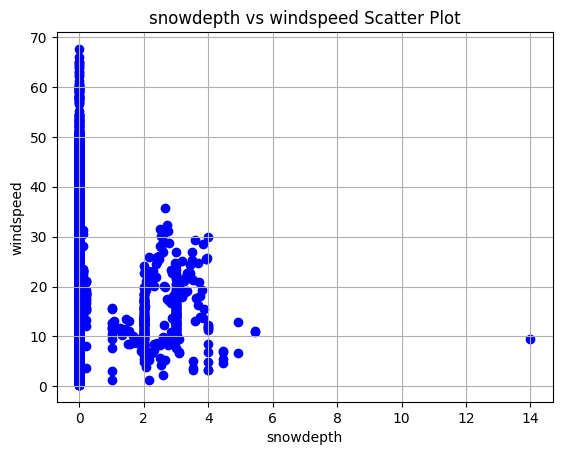

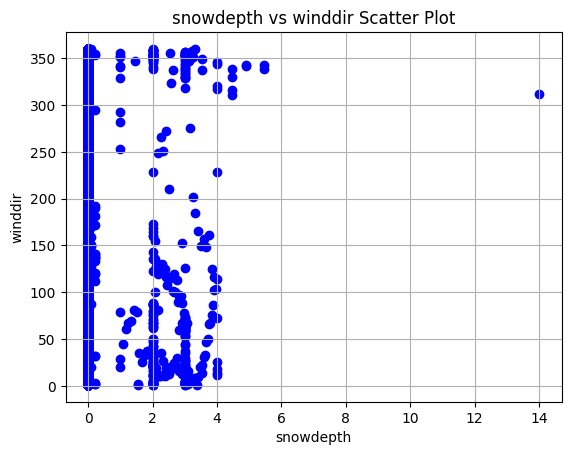

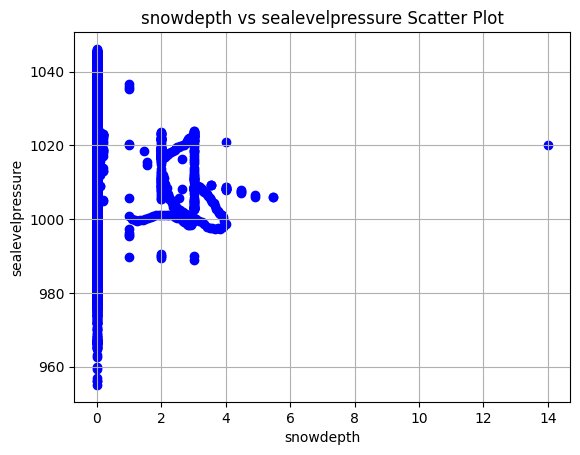

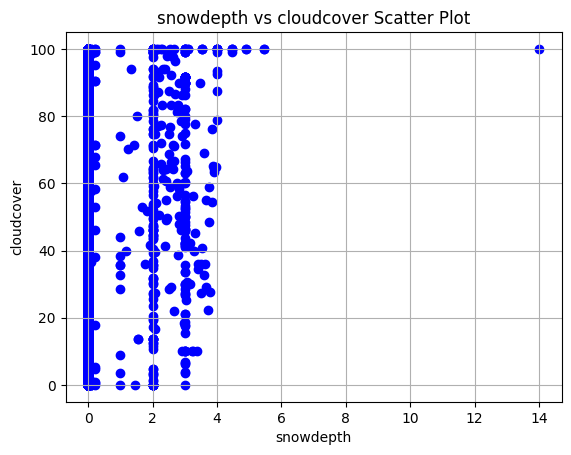

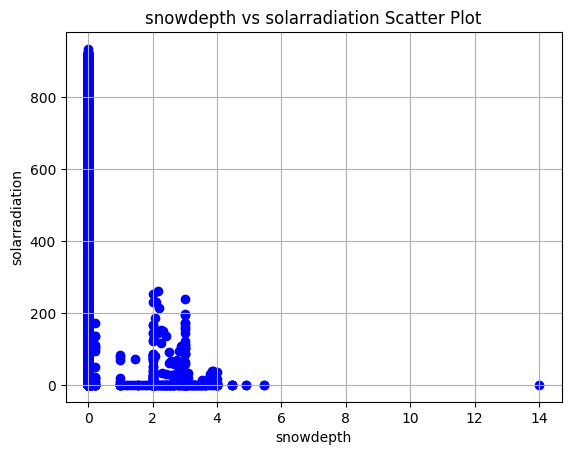

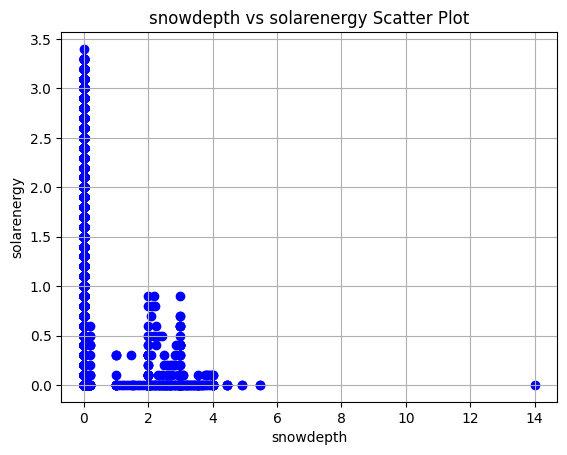

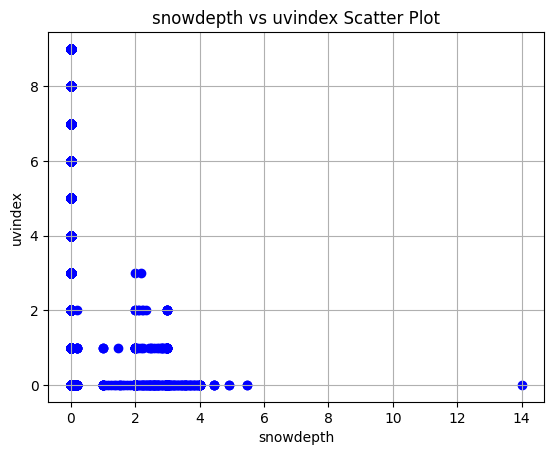

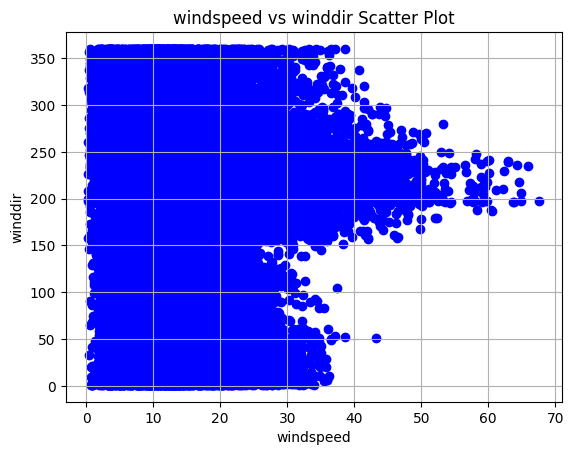

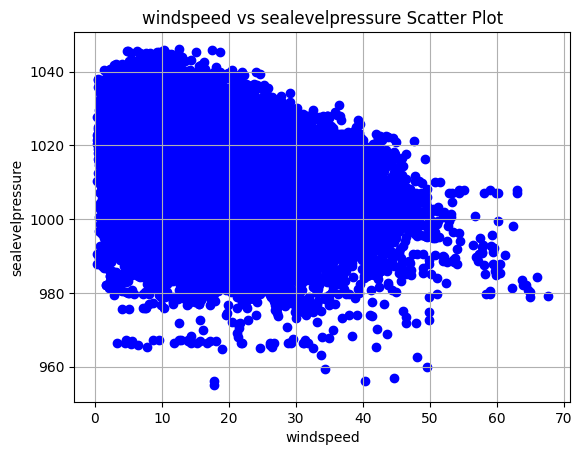

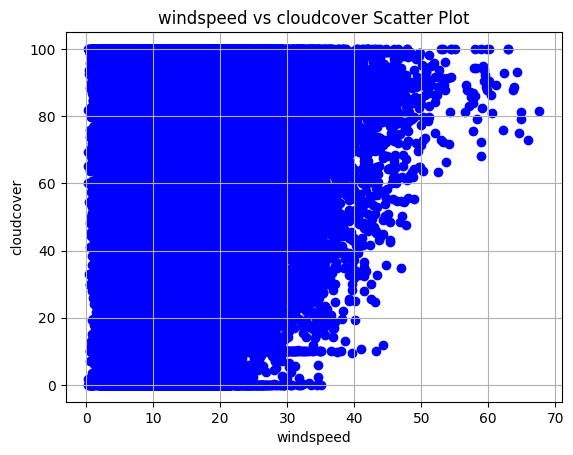

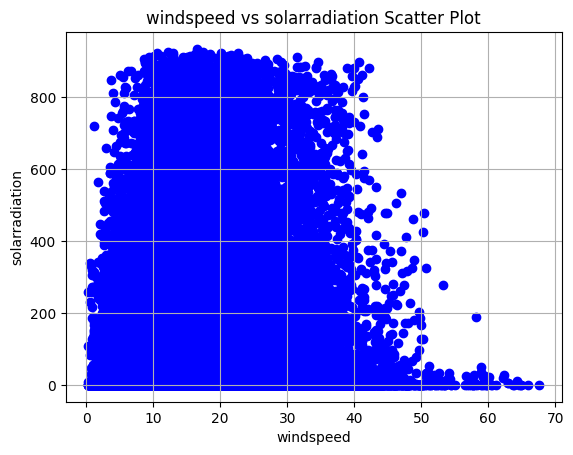

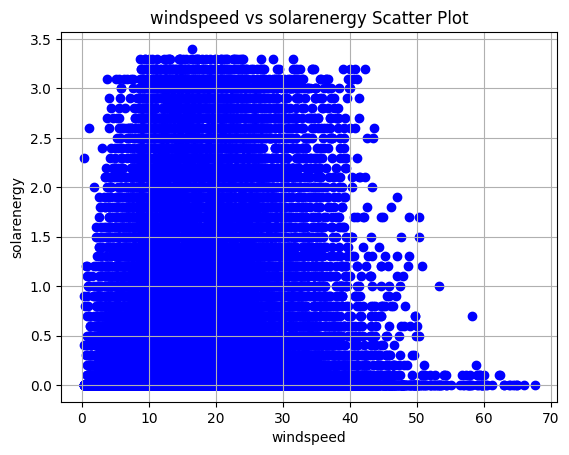

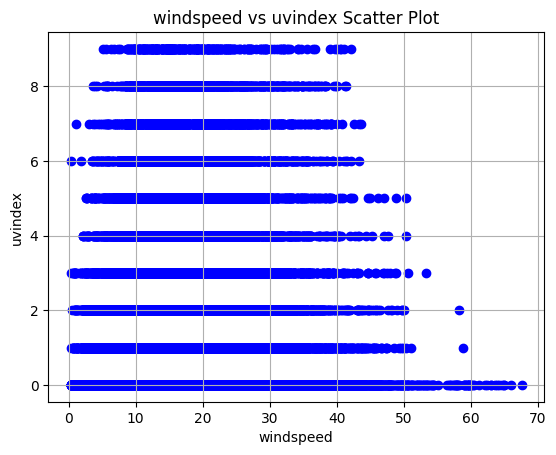

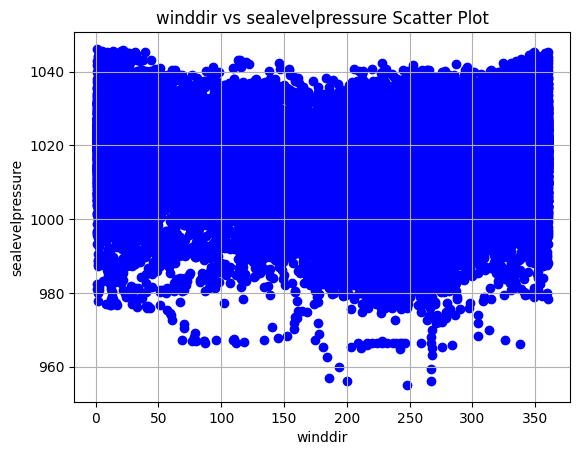

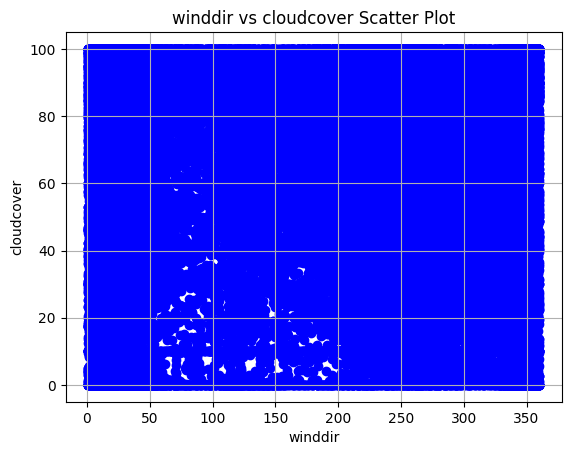

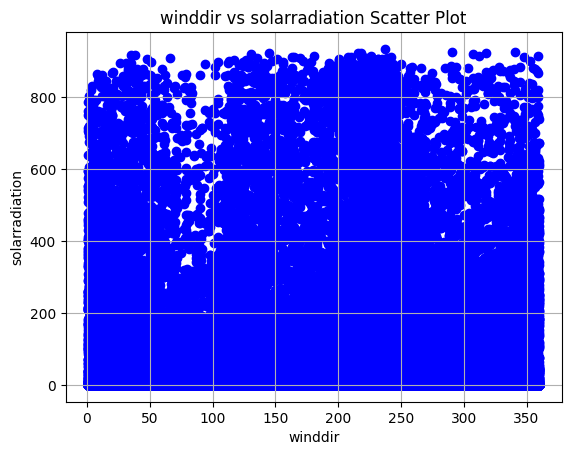

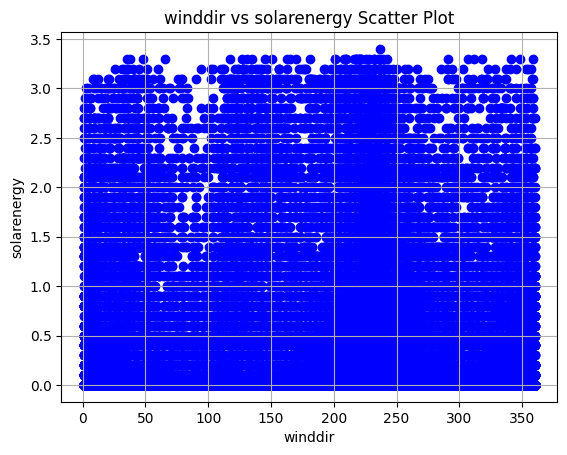

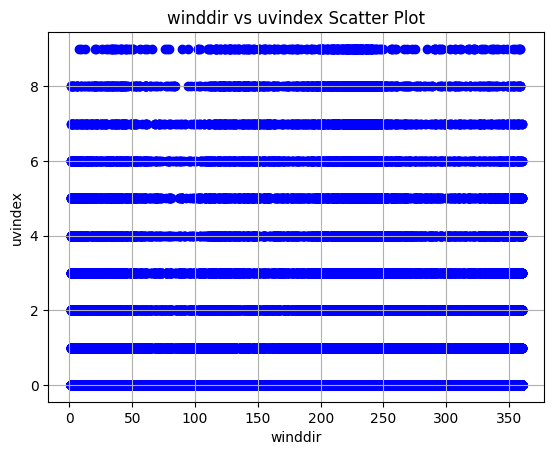

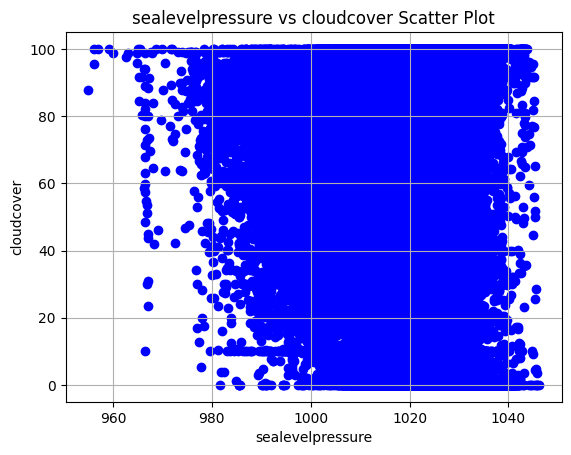

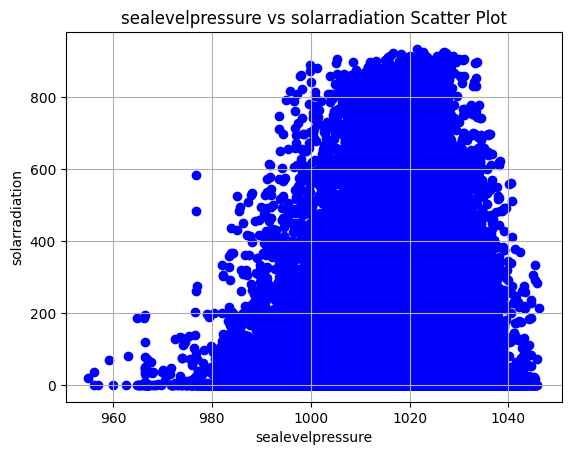

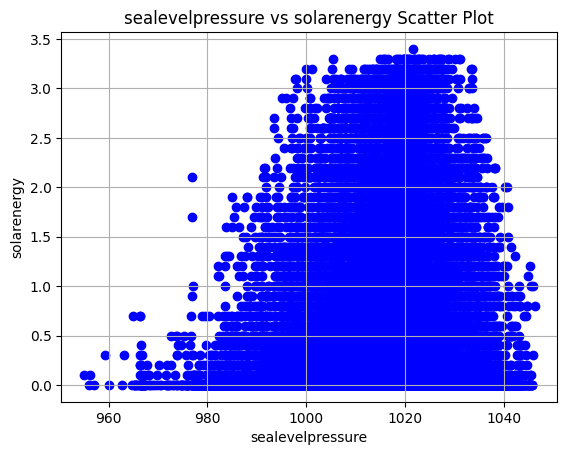

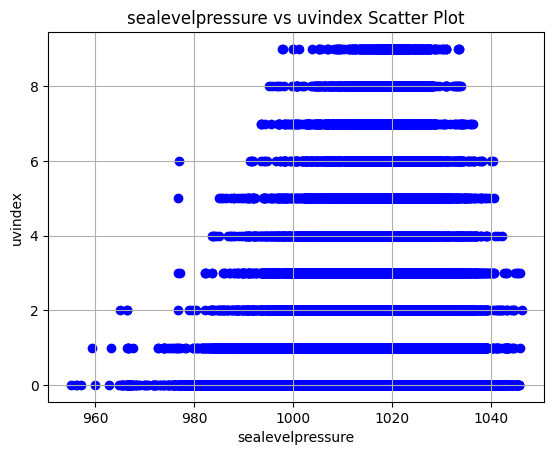

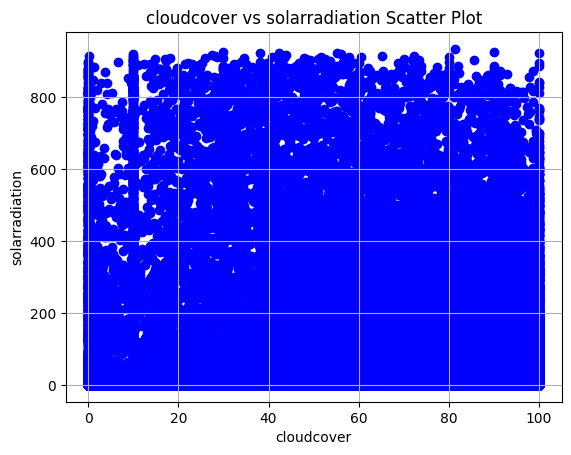

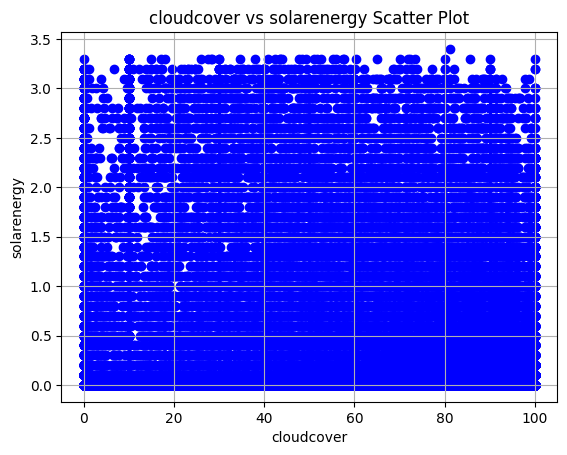

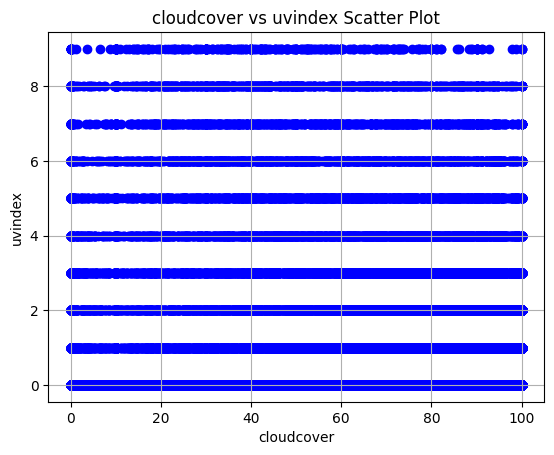

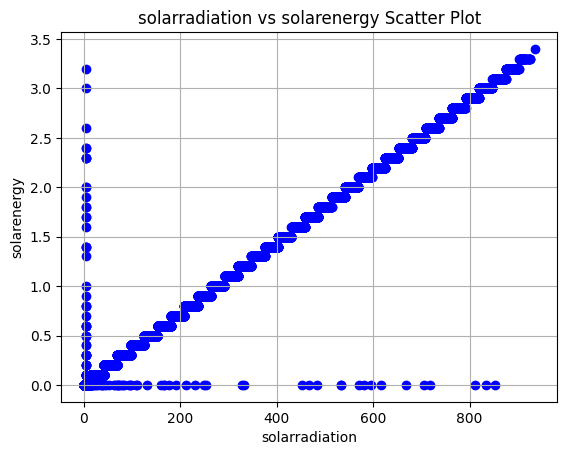

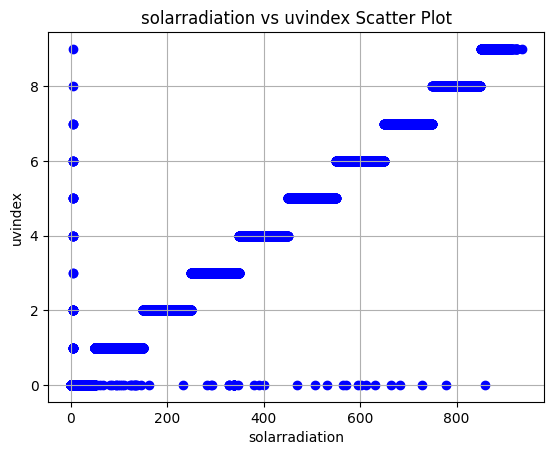

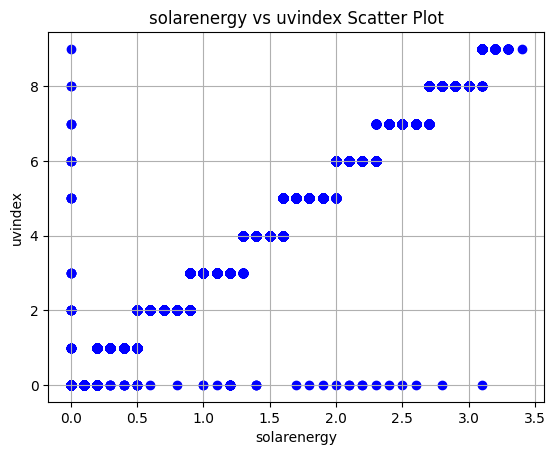

In [22]:
# Plotting scatter plots for appropriate correlations in separate windows
numerical_cols = full_df.select_dtypes(include=['float64']).columns

for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        if i < j:  # To avoid duplicate plots and self-correlations
            fig, ax = plt.subplots()
            ax.scatter(full_df[col1], full_df[col2], color='blue')
            ax.set_title(f'{col1} vs {col2} Scatter Plot')
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            ax.grid(True)
            plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Perform Min-Max normalization on numerical columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(full_df.select_dtypes(include=['float64']))
normalized_df = pd.DataFrame(normalized_data, columns=full_df.select_dtypes(include=['float64']).columns)

# Plot histograms for each normalized numerical column in separate windows
for col in normalized_df.columns:
    fig, ax = plt.subplots()
    ax.hist(normalized_df[col], bins=20, color='blue', alpha=0.7)
    ax.set_title(f'Normalized Distribution of {col}')
    ax.set_xlabel('Normalized Value')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# The above plot showcases the frequency of occurence highlighting the statistical value of each.